<a href="https://colab.research.google.com/github/NabilaAisha/Nasha.github.io/blob/main/Peramalan%20Produksi%20dan%20Konsumsi%20CPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install pandas_profiling
from pandas_profiling import ProfileReport
from plotly.offline import iplot
!pip install joypy
import joypy
import os
import glob
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 78.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=85772db31b5d4b89f1799abdb27f4cd89c0f1ff5e4be457fe436de4b7ac30c1d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attemp

<ipython-input-1-44f7874eef9e>:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Input Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data Prod & Konsum.csv to Data Prod & Konsum.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Data Prod & Konsum.csv']))

In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data.head()

,Tahun,Produksi,Konsumsi
0,2015,32.50,8.31
1,2016,31.50,12.75
2,2017,38.17,11.06
3,2018,43.11,13.49
4,2019,47.18,16.75


In [ ]:
data.describe(include='all')

,Tahun,Produksi,Konsumsi
count,8.00000,8.000000,8.000000
mean,2018.50000,41.638750,14.897500
std,2.44949,6.695151,4.209074
min,2015.00000,31.500000,8.310000
25%,2016.75000,36.752500,12.327500
50%,2018.50000,44.920000,15.120000
75%,2020.25000,46.925000,17.637500
max,2022.00000,47.180000,20.970000


# Karateristik Data

<Axes: xlabel='Tahun'>

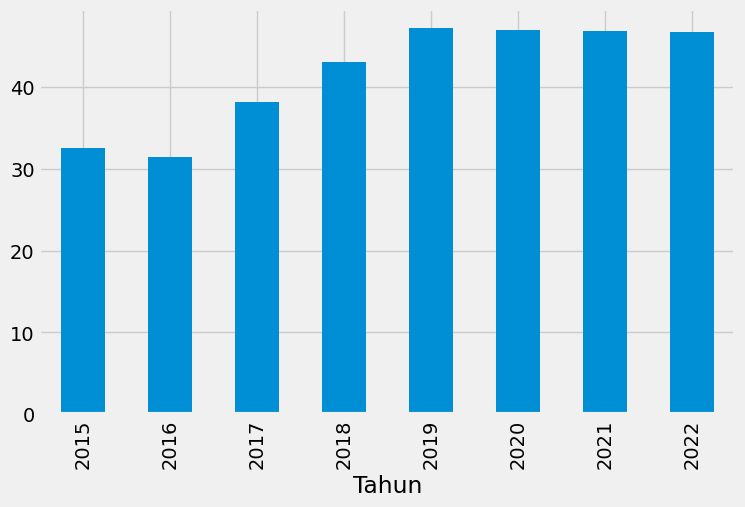

In [ ]:
data.groupby('Tahun')['Produksi'].sum().plot.bar()

<Axes: xlabel='Tahun'>

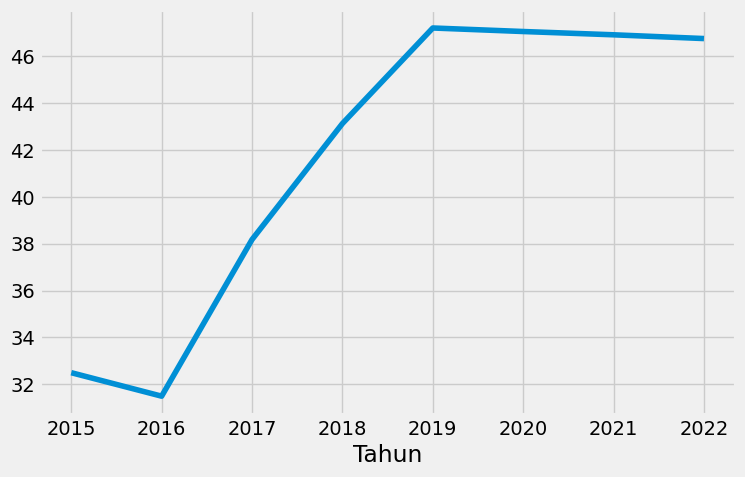

In [ ]:
data.groupby('Tahun')['Produksi'].sum().plot.line()

<Axes: xlabel='Tahun'>

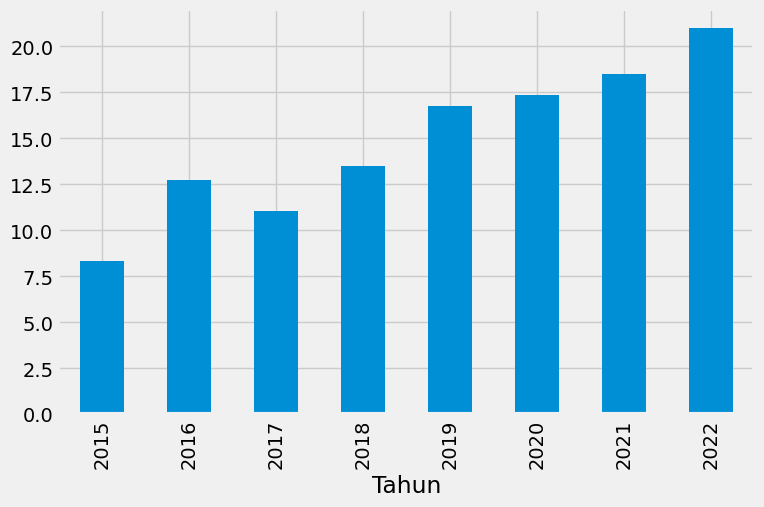

In [ ]:
data.groupby('Tahun')['Konsumsi'].sum().plot.bar()

<Axes: xlabel='Tahun'>

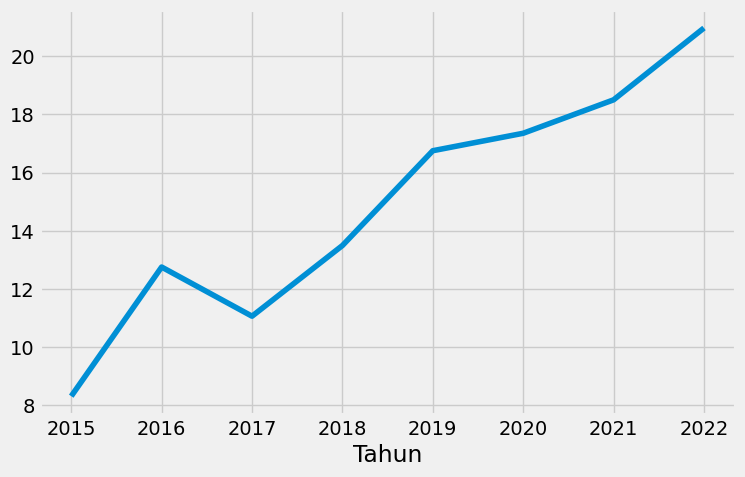

In [ ]:
data.groupby('Tahun')['Konsumsi'].sum().plot.line()

# Uji Stasioneritas

### Uji Stasioneritas Produksi Minyak Kelapa Sawit

**Uji ADF**

H0 : Data Produksi Minyak Kelapa Sawit Tidak Stasioner <br>
H1 : Data Produksi Minyak Kelapa Sawit Telah Stasioner <br>
alfa : 0,05 <br>
Daerah penolakan : Tolak H0 jika p-value < alfa <br>
Statistik uji :

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Produksi'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, value)

ADF Statistic: -2.916684113950083
p-value: 0.043441977345116276
Critical Values:
1% -6.045114
5% -3.9292800000000003
10% -2.98681


**Kesimpulan : karena pvalue < 0,05, maka tolak H0 yang berarti data produksi minyak kelapa sawit telah stasioner**


**Plot ACF**

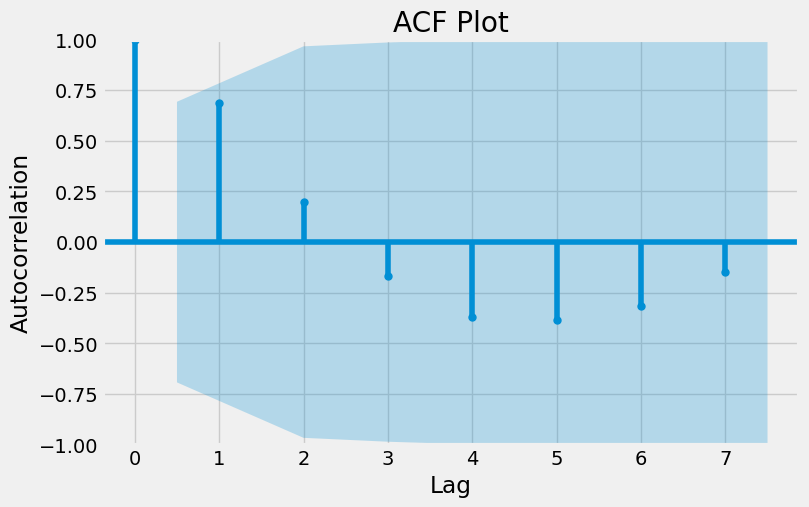

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['Produksi'], lags=len(data['Produksi'])-1)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot')
plt.show()

**Plot PACF**

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



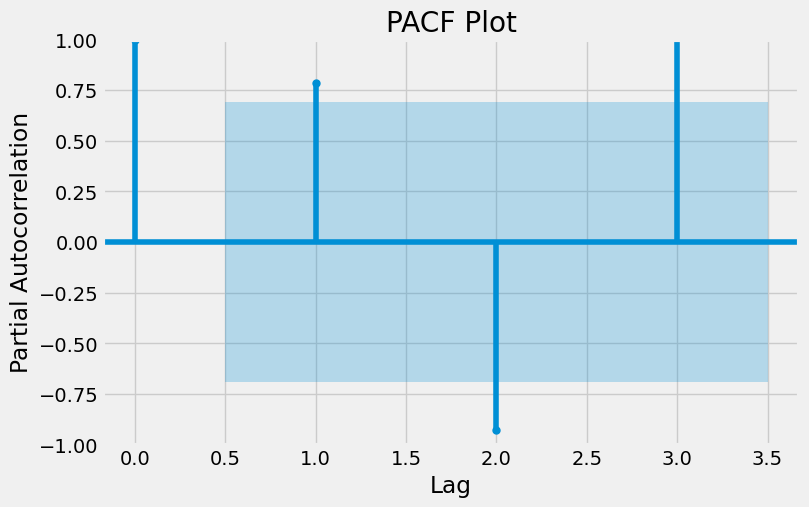

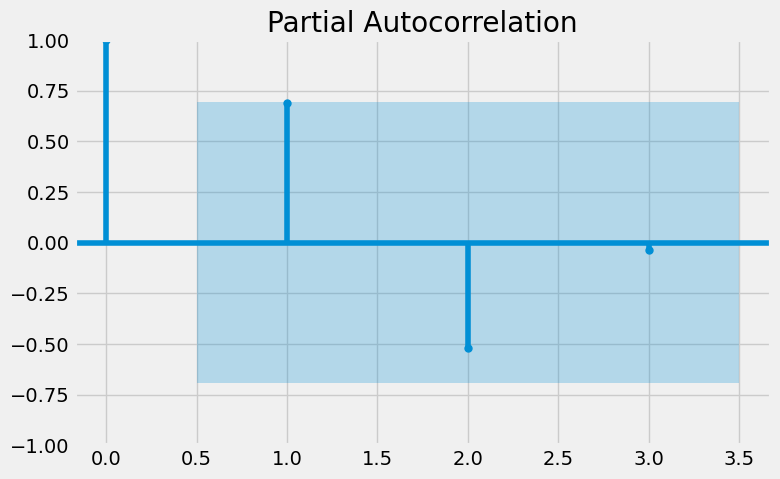

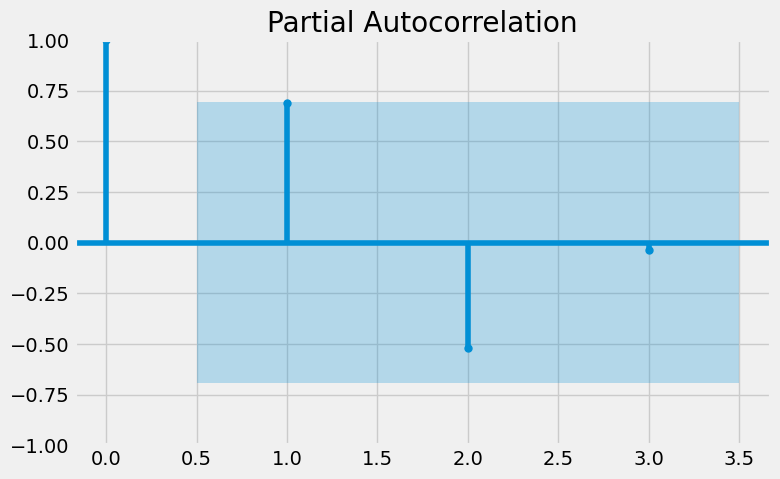

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data['Produksi'], lags=3)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF Plot')
plt.show()
plot_pacf(data['Produksi'], lags=3, method='ywm')

### Uji Stasioneritas Konsumsi Minyak Kelapa Sawit

**Uji ADF**

H0 : Data Konsumsi Minyak Kelapa Sawit Tidak Stasioner <br>
H1 : Data Konsumsi Minyak Kelapa Sawit Telah Stasioner <br>
alfa : 0,05 <br>
Daerah penolakan : Tolak H0 jika p-value < alfa <br>
Statistik uji :

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Konsumsi'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, value)

ADF Statistic: -1.739366370954243
p-value: 0.4109523125537774
Critical Values:
1% -6.045114
5% -3.9292800000000003
10% -2.98681


**Kesimpulan : karena pvalue > 0,05, maka gagal tolak H0 yang berarti data konsumsi minyak kelapa sawit telah stasioner**


Karena data konsumsi tidak stasioner, maka data perlu didifferencing terlebih dahulu

**Plot ACF**

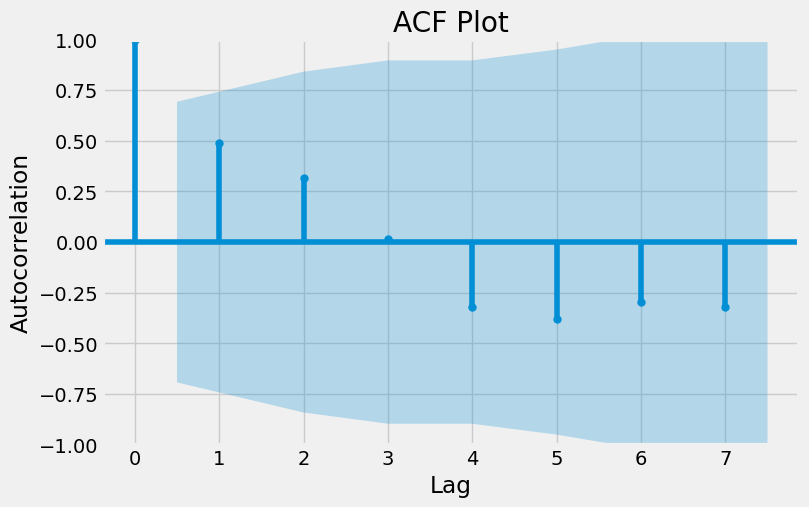

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['Konsumsi'], lags=len(data['Konsumsi'])-1)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot')
plt.show()

**Plot PACF**

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



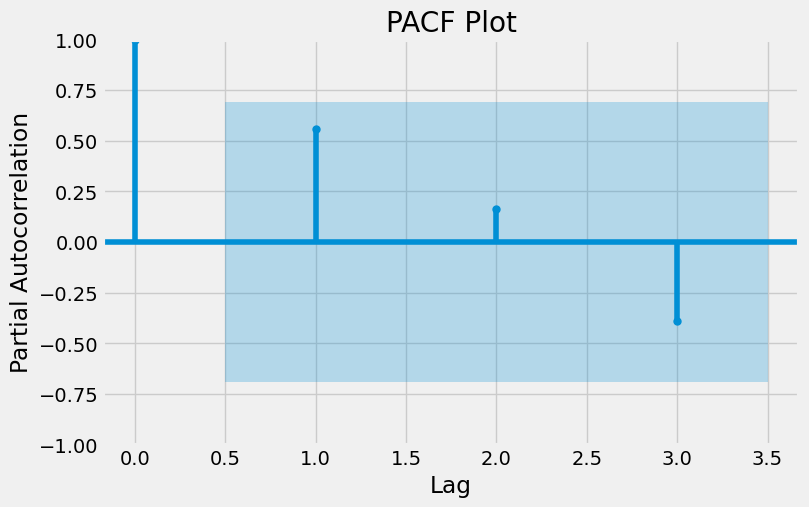

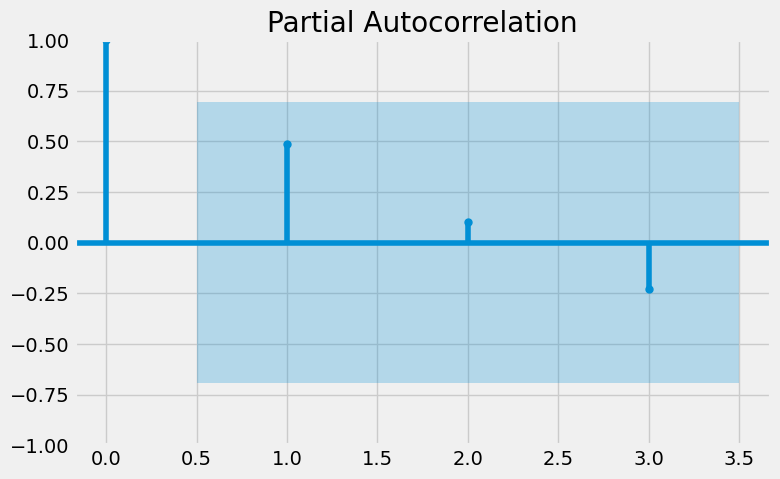

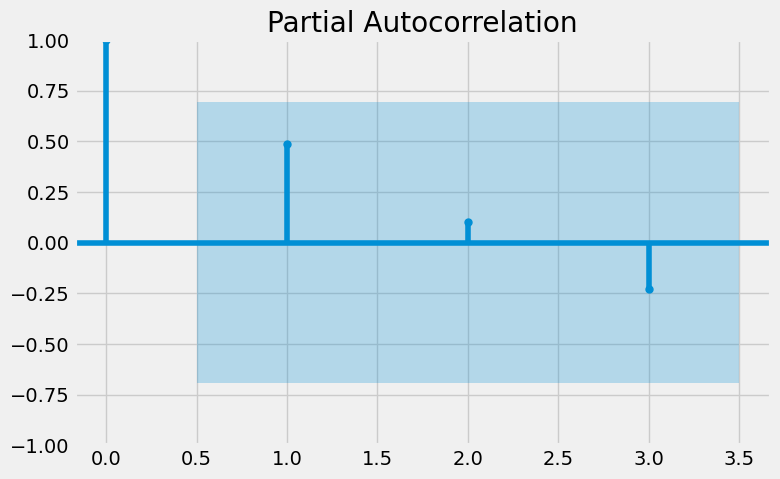

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data['Konsumsi'], lags=3)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF Plot')
plt.show()
plot_pacf(data['Konsumsi'], lags=3, method='ywm')

### Differencing Konsumsi Minyak Kelapa Sawit

In [ ]:
# Mendifferensialkan data pada lag 1
differenced_data = data['Konsumsi'].diff(periods=1).dropna()

In [ ]:
# Menampilkan data yang sudah didifferensialkan
print(differenced_data)

1    4.44
2   -1.69
3    2.43
4    3.26
5    0.60
6    1.15
7    2.47
Name: Konsumsi, dtype: float64


In [ ]:
differenced_data.head()

1    4.44
2   -1.69
3    2.43
4    3.26
5    0.60
Name: Konsumsi, dtype: float64

### Pengecekan kembali stasioneritas data konsumsi minyak kelapa sawit

**Uji ADF**

H0 : Data Konsumsi Minyak Kelapa Sawit Tidak Stasioner <br>
H1 : Data Konsumsi Minyak Kelapa Sawit Telah Stasioner <br>
alfa : 0,05 <br>
Daerah penolakan : Tolak H0 jika p-value < alfa <br>
Statistik uji :

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(differenced_data)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, value)

ADF Statistic: -10.773833329969838
p-value: 2.347158222856207e-19
Critical Values:
1% -6.045114
5% -3.9292800000000003
10% -2.98681


**Kesimpulan : p-value < 0,05 sehingga diputuskan tolak H0 yang artinya data konsumsi minyak kelapa sawit telah stasioner**

**Plot ACF**

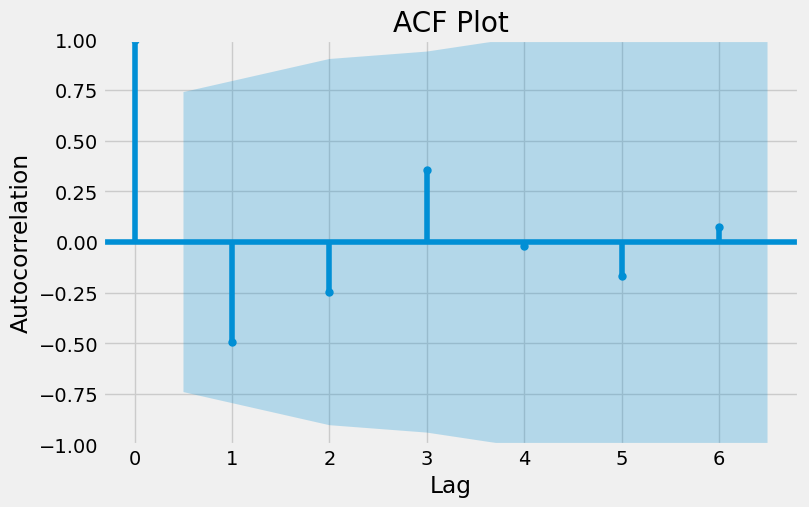

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(differenced_data, lags=len(differenced_data)-1)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot')
plt.show()

**Plot PACF**

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



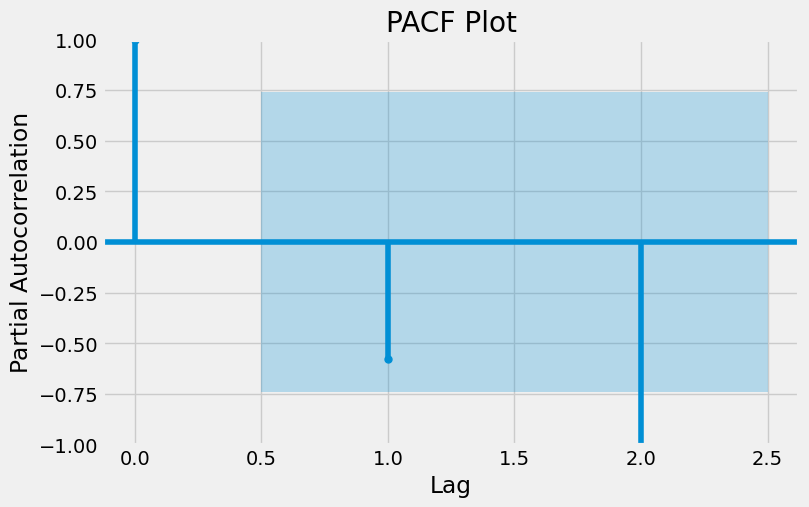

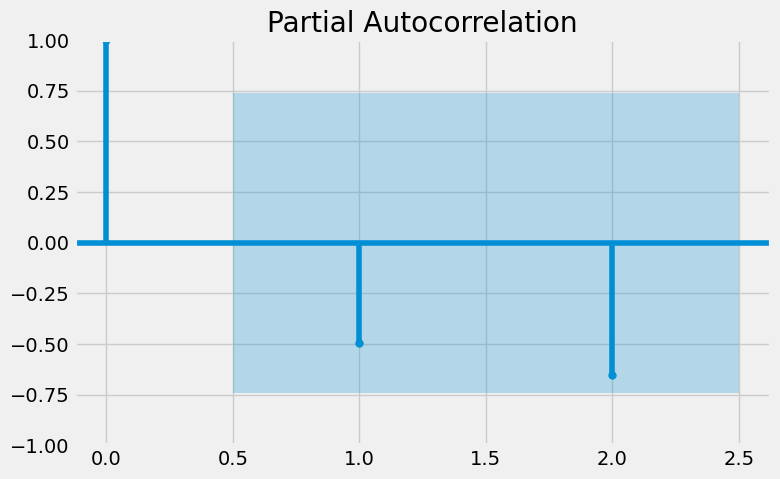

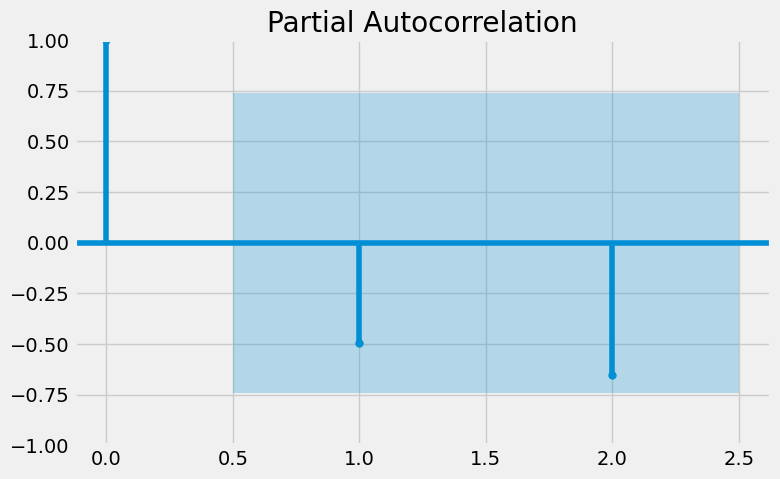

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(differenced_data, lags=2)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF Plot')
plt.show()
plot_pacf(differenced_data, lags=2, method='ywm')

#ARIMA

###Arima Konsumsi Minyak Sawit

In [ ]:
data_konsumsi = data.drop(['Produksi'],axis=1)

In [ ]:
data_konsumsi.head()

,Tahun,Konsumsi
0,2015,8.31
1,2016,12.75
2,2017,11.06
3,2018,13.49
4,2019,16.75


In [ ]:
Year = data['Tahun']

In [ ]:
Year.head()

0    2015
1    2016
2    2017
3    2018
4    2019
Name: Tahun, dtype: int64

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.4 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima
# Menentukan model ARIMA terbaik dengan menggunakan AutoARIMA
model = auto_arima(differenced_data, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=35.178, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=37.160, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=37.168, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=32.487, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=31.675, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=27.505, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=25.915, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=29.488, Time=0.20 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=25.342, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 1.305 seconds


In [ ]:
# Menentukan jumlah tahun untuk proyeksi
jumlah_tahun = 10

# Menghitung jumlah periode untuk proyeksi
jumlah_periode = jumlah_tahun

# Melakukan peramalan untuk jumlah_periode ke depan
forecast, conf_int = model.predict(n_periods=jumlah_periode, return_conf_int=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
forecast, conf_int

(7     2.030671
 8     0.647544
 9     2.143026
 10    2.290218
 11    0.855701
 12    1.762043
 13    2.380783
 14    1.128571
 15    1.484348
 16    2.339209
 dtype: float64,
 array([[ 1.37655032,  2.68479209],
        [-0.95696286,  2.25205022],
        [ 0.26178914,  4.0242627 ],
        [ 0.32066999,  4.25976681],
        [-1.50467861,  3.21608049],
        [-0.6335678 ,  4.15765473],
        [-0.16187799,  4.9234446 ],
        [-1.59895926,  3.85610167],
        [-1.24263039,  4.21132541],
        [-0.53521925,  5.2136365 ]]))

In [ ]:
# Membuat range tahun untuk proyeksi
future_years = pd.RangeIndex(start=Year.max() + 1, stop=Year.max() + 1 + jumlah_periode, step=1)

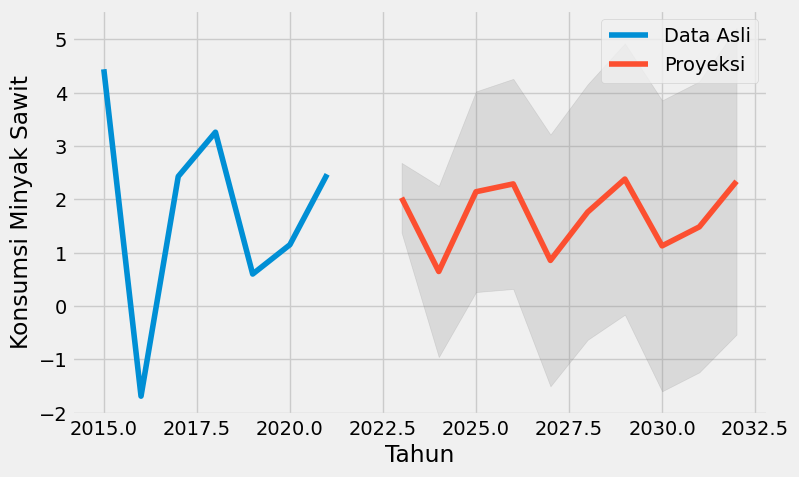

In [ ]:
# Memvisualisasikan hasil proyeksi
plt.plot(Year[:-1], differenced_data, label='Data Asli')
plt.plot(future_years, forecast, label='Proyeksi')
plt.fill_between(future_years, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2)
plt.xlabel('Tahun')
plt.ylabel('Konsumsi Minyak Sawit')
plt.legend()
plt.show()

###Arima Produksi Minyak Sawit

In [ ]:
data_Prod = data.drop(['Konsumsi'],axis=1)

In [ ]:
Produksi = data['Produksi']

In [ ]:
from pmdarima.arima import auto_arima
# Menentukan model ARIMA terbaik dengan menggunakan AutoARIMA
model1 = auto_arima(Produksi, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=52.005, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=84.546, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=53.593, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=nan, Time=0.05 sec


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning:

Error fitting  ARIMA(1,0,2)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "/usr/local/lib/python3

 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.798 seconds


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning:

Error fitting  ARIMA(2,0,2)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "/usr/local/lib/python3

In [ ]:
# Menentukan jumlah tahun untuk proyeksi
jumlah_tahun = 10

# Menghitung jumlah periode untuk proyeksi
jumlah_periode = jumlah_tahun

# Melakukan peramalan untuk jumlah_periode ke depan
forecast, conf_int = model1.predict(n_periods=jumlah_periode, return_conf_int=True)

In [ ]:
forecast, conf_int

(8     46.381556
 9     46.114201
 10    45.848388
 11    45.584106
 12    45.321348
 13    45.060105
 14    44.800368
 15    44.542128
 16    44.285376
 17    44.030104
 dtype: float64,
 array([[40.37104865, 52.39206275],
        [35.6735053 , 56.55489694],
        [32.39282127, 59.30395401],
        [29.70115206, 61.46706068],
        [27.35845443, 63.28424254],
        [25.25471068, 64.86549972],
        [23.32848364, 66.27225193],
        [21.54127481, 67.54298031],
        [19.86704267, 68.70370912],
        [18.2871808 , 69.77302761]]))

In [ ]:
# Membuat range tahun untuk proyeksi
future_years = pd.RangeIndex(start=Year.max() + 1, stop=Year.max() + 1 + jumlah_periode, step=1)

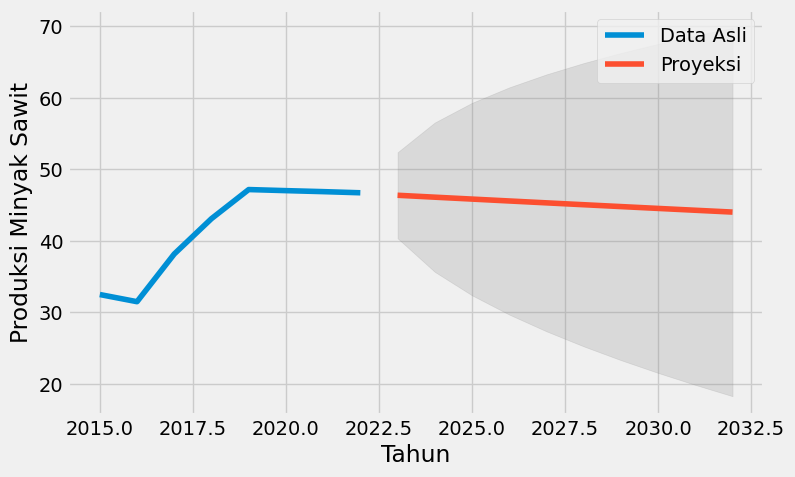

In [ ]:
# Memvisualisasikan hasil proyeksi
plt.plot(Year, Produksi, label='Data Asli')
plt.plot(future_years, forecast, label='Proyeksi')
plt.fill_between(future_years, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2)
plt.xlabel('Tahun')
plt.ylabel('Produksi Minyak Sawit')
plt.legend()
plt.show()

###Interpretasi ARIMA Produksi dan Konsumsi

*   Model ARIMA konsumsi terbaik adalah saat AR = 2, I = 0, dan MA = 2, dilihat dari nilai AIC sebesar 25
*   Model ARIMA produksi terbaik adalah saat AR = 1, I = 0, dan MA = 1, dilihat dari nilai AIC sebesar 52,005
*   Proyeksi Produksi dan Konsumsi untuk 10 tahun terdepan cenderung mengalami penurunan

